<a href="https://colab.research.google.com/github/gundarapuravali/FUTURE_ML_01/blob/main/Sales_Forecasting_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('sales_data.csv')

# Rename columns to fit Prophet's requirements
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])  # Convert to datetime
df.head()


,ds,y
0,2025-06-01,2521
1,2025-06-02,2723
2,2025-06-03,2207
3,2025-06-04,2600
4,2025-06-05,2452


In [3]:
!pip install prophet

from prophet import Prophet
import matplotlib.pyplot as plt


In [4]:
# Initialize the model
model = Prophet()

# Fit the model on data
model.fit(df)

# Create a dataframe for future predictions (next 15 days)
future = model.make_future_dataframe(periods=15)

# Predict
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfeavlq0n/23dv5lpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfeavlq0n/1iuu5i8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6589', 'data', 'file=/tmp/tmpfeavlq0n/23dv5lpt.json', 'init=/tmp/tmpfeavlq0n/1iuu5i8m.json', 'output', 'file=/tmp/tmpfeavlq0n/prophet_model3m0ztxc9/prophet_model-20250731063946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

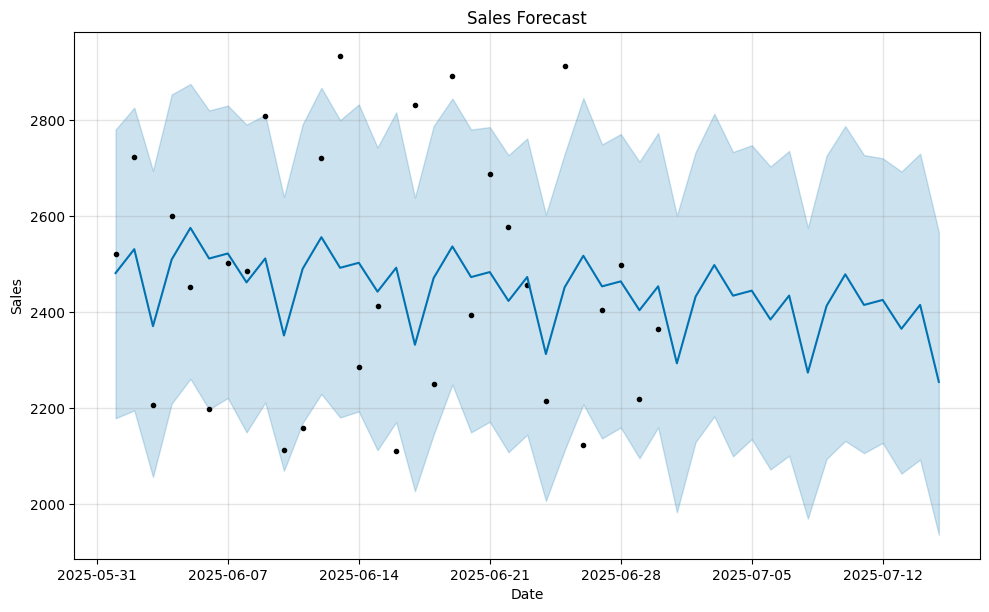

In [5]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


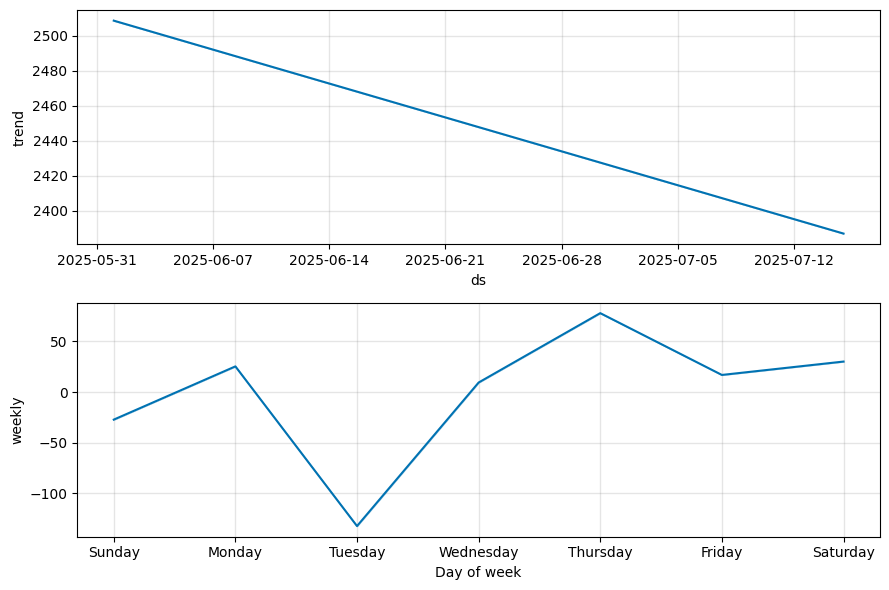

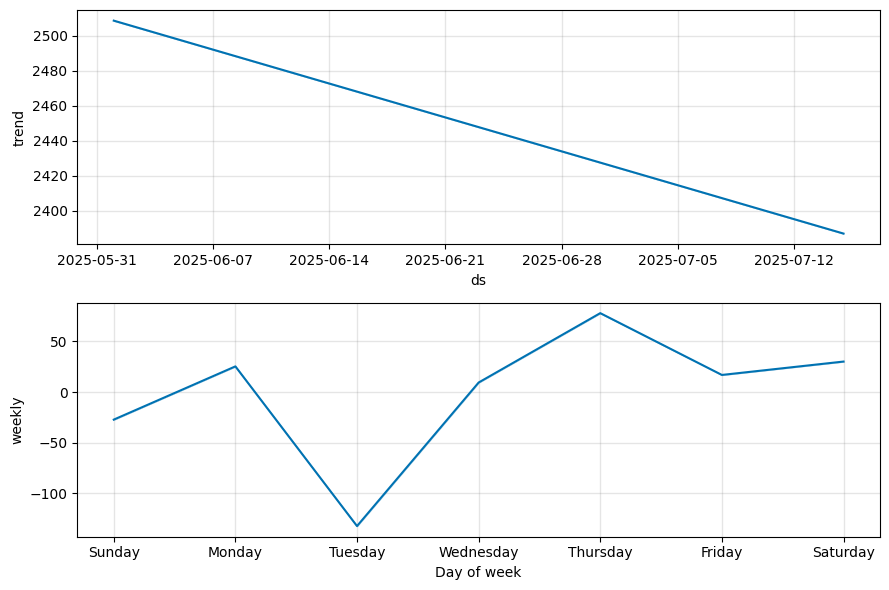

In [6]:
# Optional: Show components like trend and weekly seasonality
model.plot_components(forecast)
